In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("sentiment.csv")
df

,ID,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,Enjoying a beautiful day at the park! ...,Positive,15-01-2023 12:30,User123,Twitter,#Nature #Park,15,30,USA,2023,1,15,12
1,1,Traffic was terrible this morning. ...,Negative,15-01-2023 08:45,CommuterX,Twitter,#Traffic #Morning,5,10,Canada,2023,1,15,8
2,2,Just finished an amazing workout! 💪 ...,Positive,15-01-2023 15:45,FitnessFan,Instagram,#Fitness #Workout,20,40,USA,2023,1,15,15
3,3,Excited about the upcoming weekend getaway! ...,Positive,15-01-2023 18:20,AdventureX,Facebook,#Travel #Adventure,8,15,UK,2023,1,15,18
4,4,Trying out a new recipe for dinner tonight. ...,Neutral,15-01-2023 19:55,ChefCook,Instagram,#Cooking #Food,12,25,Australia,2023,1,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,728,Collaborating on a science project that receiv...,Happy,18-08-2017 18:20,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20,39,UK,2017,8,18,18
728,729,Attending a surprise birthday party organized ...,Happy,22-06-2018 14:15,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25,48,USA,2018,6,22,14
729,730,Successfully fundraising for a school charity ...,Happy,05-04-2019 17:30,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22,42,Canada,2019,4,5,17
730,731,"Participating in a multicultural festival, cel...",Happy,29-02-2020 20:45,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21,43,UK,2020,2,29,20


In [30]:
# 1. In the sentiment feature and text, trim white spaces and convert to lowercase.
df["Text"] = df["Text"].str.strip().str.lower()
df["Sentiment"] = df["Sentiment"].str.strip().str.lower()
df

,ID,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,enjoying a beautiful day at the park!,positive,15-01-2023 12:30,User123,Twitter,#Nature #Park,15,30,USA,2023,1,15,12
1,1,traffic was terrible this morning.,negative,15-01-2023 08:45,CommuterX,Twitter,#Traffic #Morning,5,10,Canada,2023,1,15,8
2,2,just finished an amazing workout! 💪,positive,15-01-2023 15:45,FitnessFan,Instagram,#Fitness #Workout,20,40,USA,2023,1,15,15
3,3,excited about the upcoming weekend getaway!,positive,15-01-2023 18:20,AdventureX,Facebook,#Travel #Adventure,8,15,UK,2023,1,15,18
4,4,trying out a new recipe for dinner tonight.,neutral,15-01-2023 19:55,ChefCook,Instagram,#Cooking #Food,12,25,Australia,2023,1,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,728,collaborating on a science project that receiv...,happy,18-08-2017 18:20,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20,39,UK,2017,8,18,18
728,729,attending a surprise birthday party organized ...,happy,22-06-2018 14:15,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25,48,USA,2018,6,22,14
729,730,successfully fundraising for a school charity ...,happy,05-04-2019 17:30,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22,42,Canada,2019,4,5,17
730,731,"participating in a multicultural festival, cel...",happy,29-02-2020 20:45,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21,43,UK,2020,2,29,20


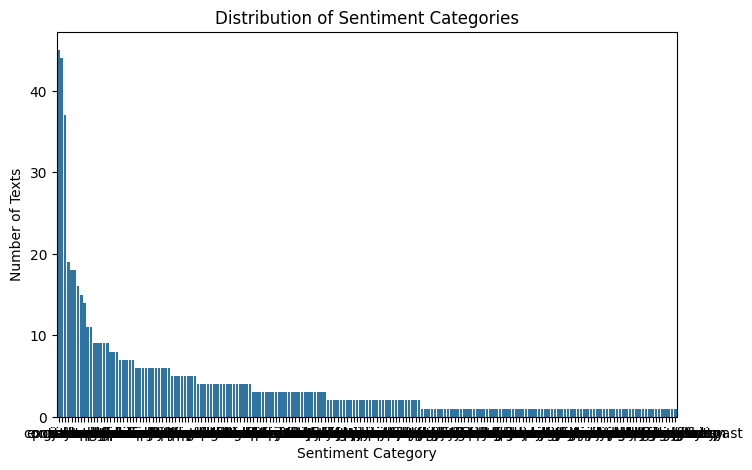

In [31]:
# 2. What are the sentiment categories? 
# Tabulate and visualize the number of texts for each category.
sentiment_counts = df["Sentiment"].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.xlabel("Sentiment Category")
plt.ylabel("Number of Texts")
plt.title("Distribution of Sentiment Categories")
plt.show()

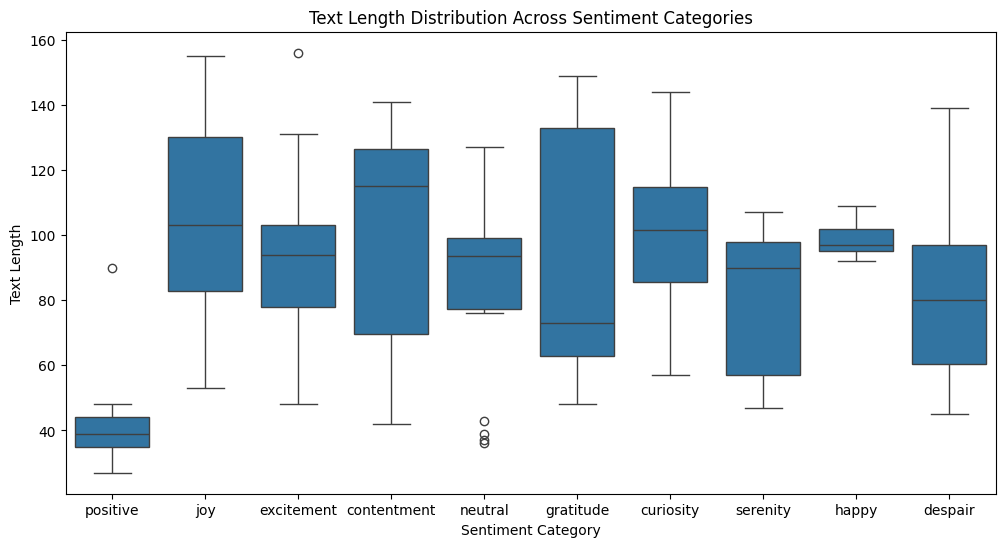

In [32]:
# 3. Tabulate and Visualize the text length for each sentiment category.
df["Text_Length"] = df["Text"].str.len()
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Sentiment", y="Text_Length", order=sentiment_counts.index[:10])
plt.xlabel("Sentiment Category")
plt.ylabel("Text Length")
plt.title("Text Length Distribution Across Sentiment Categories")
plt.show()

In [33]:
# 4. Find and display the text(s) with the maximum number of likes.
max_likes = df["Likes"].max()
most= df[df["Likes"] == max_likes][["Text", "Likes"]]
print(f"The texts with maximum number of likes:\n{most}")

The texts with maximum number of likes:
                                                  Text  Likes
335  thrilled to witness the grandeur of a cultural...     80
345  motivated to achieve fitness goals after an in...     80
355  anticipation for an upcoming adventure in an e...     80
368  elation over discovering a rare book in a quai...     80
382  a sense of wonder at the vastness of the cosmo...     80
402  awe-inspired by the vastness of the cosmos on ...     80
432  heartache deepens, a solitary journey through ...     80
470  dancing on sunshine, each step a celebration o...     80
481  surrounded by the colors of joy, a canvas pain...     80
510  at the front row of adele's concert, each note...     80
520  at a justin bieber concert, the infectious bea...     80
530  captivated by the spellbinding plot twists, th...     80
540  celebrating a historic victory in the world cu...     80
550  after a series of defeats, the soccer team fac...     80
560  in the serene beauty of a

In [34]:
# 5.Find and display the text(s) with the maximum reposts. what is its sentiment?
max_reposts = df["Retweets"].max()
mostRe = df[df["Retweets"] == max_reposts][["Text", "Retweets", "Sentiment"]]
print(f"The texts with the maximum reposts:{mostRe}")

The texts with the maximum reposts:                                                  Text  Retweets  \
335  thrilled to witness the grandeur of a cultural...        40   
345  motivated to achieve fitness goals after an in...        40   
355  anticipation for an upcoming adventure in an e...        40   
368  elation over discovering a rare book in a quai...        40   
382  a sense of wonder at the vastness of the cosmo...        40   
402  awe-inspired by the vastness of the cosmos on ...        40   
432  heartache deepens, a solitary journey through ...        40   
470  dancing on sunshine, each step a celebration o...        40   
481  surrounded by the colors of joy, a canvas pain...        40   
510  at the front row of adele's concert, each note...        40   
520  at a justin bieber concert, the infectious bea...        40   
530  captivated by the spellbinding plot twists, th...        40   
540  celebrating a historic victory in the world cu...        40   
550  after a 

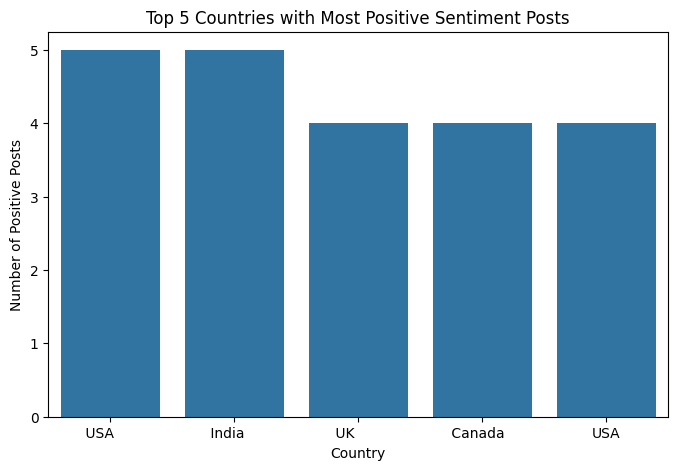

In [35]:
# 6. Tabulate and Visualize the top 5 countries that have posted the most texts with a positive sentiment.
top_countries = df[df["Sentiment"] == "positive"]["Country"].value_counts().head(5)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.xlabel("Country")
plt.ylabel("Number of Positive Posts")
plt.title("Top 5 Countries with Most Positive Sentiment Posts")
plt.show()

In [36]:
# 7. Find and display all the text(s) with the word ‘Travel’ in their hashtag.
travel_texts = df[df["Hashtags"].str.contains("travel", case=False, na=False)][["Text", "Hashtags"]]
print(travel_texts)

                                                  Text  \
3          excited about the upcoming weekend getaway!   
72   excitement building up for the upcoming vacation!   
84   enjoying every moment of this trip—pure enjoym...   
145  arousal of excitement before a much-awaited trip.   
596  spontaneously booked a weekend getaway. advent...   
610  embarked on a road trip to revisit cherished p...   
622  embarked on a solo travel adventure, discoveri...   

                                            Hashtags  
3          #Travel #Adventure                         
72       #Excitement #TravelPlans                     
84     #Enjoyment #Travel                             
145   #Arousal #TravelAdventure                       
596                       #GetawayGoals #TeenTravel   
610                  #CherishedPlaces #SeniorTravel   
622                #DiscoverNewPlaces #SeniorTravel   


In [37]:
# 8. Find and display the most popular (most number of likes) posts (top 5) from the year 2020 which were of a negative sentiment.
top_negative_2020 = df[(df["Sentiment"] == "negative") & (df["Year"] == 2020)]
mostNeg = top_negative_2020.nlargest(5, "Likes")[["Text", "Likes"]]
print(f"Most liked posts in 2020 of negative sentiment:\n{mostNeg}")

Most liked posts in 2020 of negative sentiment:
Empty DataFrame
Columns: [Text, Likes]
Index: []


In [38]:
# 9. Find and display a list of Users and their posts whose texts are labeled ‘Happiness’ sentiment.
happiness_posts = df[df["Sentiment"] == "happiness"][["User", "Text"]]
print(f"List of Users and their posts with 'Happiness' sentiment:\n{happiness_posts}")

List of Users and their posts with 'Happiness' sentiment:
                     User                                               Text
56       ProudFriend       pure happiness: celebrating a loved one's achi...
80       NewParentJoy      overflowing happiness: welcoming a new family ...
367   SunnyDayEnthusiast   happiness blooms like flowers in a garden on a...
471       EchoedLaughter   laughter echoes in the air, a chorus of happin...
488     LaughterSymphony   a symphony of laughter, each note a key to unl...


/tmp/ipykernel_1016/3931750662.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["Country"] = filtered_df["Country"].str.strip().str.title()


<Figure size 1200x600 with 0 Axes>

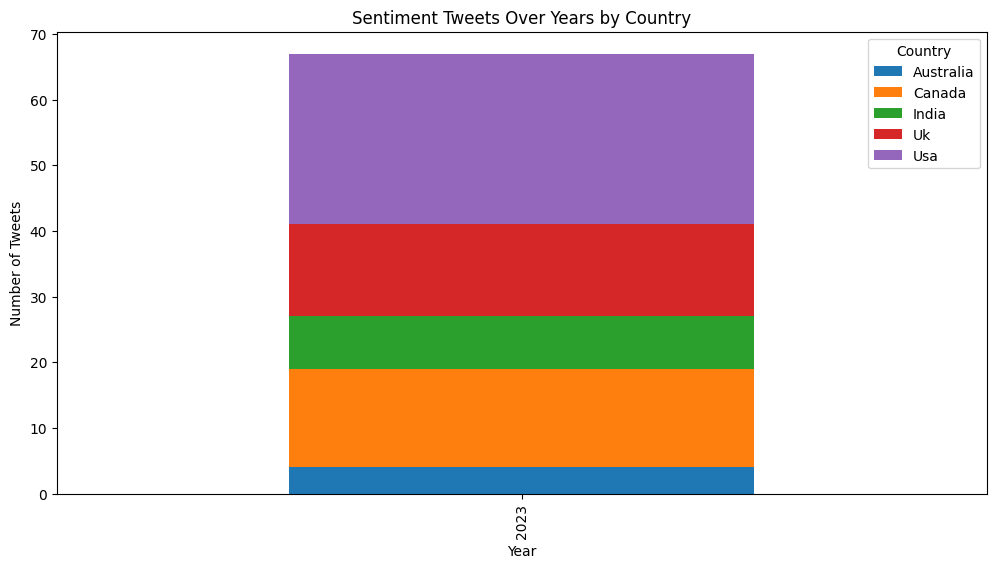

In [40]:
# 10. Tabulate and visualize the years and countrywide tweets of the sentiments. 
# Pick tweets with sentiments, ‘Positive,’ ‘Negative,’ and ‘Neutral’ only.
selected_sentiments = ["positive", "negative", "neutral"]
filtered_df = df[df["Sentiment"].isin(selected_sentiments)]
filtered_df["Country"] = filtered_df["Country"].str.strip().str.title()
year_country_counts = filtered_df.groupby(["Year", "Country"]).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
year_country_counts.plot(kind="bar", stacked=True, figsize=(12, 6))
plt.xlabel("Year")
plt.ylabel("Number of Tweets")
plt.title("Sentiment Tweets Over Years by Country")
plt.legend(title="Country")
plt.show()